In [ ]:
#1
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Loading the dataset
data = pd.read_csv('2021_August_twitter_trending_data.csv')

In [ ]:
#2
data.head()

,tweet_id,tweet_datetime,tweet_hashtags,tweet_language,retweet_count,tweet_source,tweet_source_url,tweet_text,user_created_datetime,user_name,user_followers_count,user_description,user_location,searched_by_hashtag,searched_at_datetime,searched_hashtag_country
0,1.42398E+18,8/7/2021 12:11,NRLManlyStorm,en,11,Twitter for iPhone,http://twitter.com/download/iphone,RT @NRL: Job done 🗣\n\n#NRLManlyStorm https://...,2/6/2016 15:24,PROS,654.0,#Aotearoa #NZ,"Auckland, New Zealand",#NRLManlyStorm,16:10.1,Australia
1,1.42398E+18,8/7/2021 12:10,NRLManlyStorm,en,20,Twitter for iPhone,http://twitter.com/download/iphone,RT @NRL: 17 STRONG\n\n#NRLManlyStorm @bundaber...,2/6/2016 15:24,PROS,654.0,#Aotearoa #NZ,"Auckland, New Zealand",#NRLManlyStorm,16:10.1,Australia
2,1.42398E+18,8/7/2021 12:08,NRLManlyStorm,en,0,WSC Sports,http://wsc-sports.com,One of the greatest coaches in the world... Zo...,2/15/2011 21:47,Fox League,136818.0,Channel dedicated to Rugby League 📺 #FoxLeague...,Australia,#NRLManlyStorm,16:10.1,Australia
3,1.42398E+18,8/7/2021 12:07,NRLManlyStorm,en,11,Twitter for Android,http://twitter.com/download/android,RT @NRL: Job done 🗣\n\n#NRLManlyStorm https://...,4/5/2016 4:07,🇦🇺 🌸AussieChic🌸 🇦🇺 Footy is back! 💜⚡,717.0,Opinionated proud Aussie. \nGroup winning 🏇 br...,"Melbourne, Victoria",#NRLManlyStorm,16:10.1,Australia
4,1.42398E+18,8/7/2021 12:05,NaN,en,1,Twitter Web App,https://mobile.twitter.com,RT @Louise_Hislop: Can someone tell Cameron Mu...,1/29/2011 10:46,A.Lizard,3105.0,"electronics-computer R&D. ex-tech journo,SFare...",SF Bay Area,#NRLManlyStorm,16:10.1,Australia


In [ ]:
#3
# Dropping rows with missing hashtags
data = data.dropna(subset=['tweet_hashtags'])

# Preprocessing: Clean and preprocess the hashtags
def preprocess_hashtags(hashtags):
    return hashtags.lower()

data['tweet_hashtags'] = data['tweet_hashtags'].apply(preprocess_hashtags)


<ipython-input-5-0e20963d334d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet_hashtags'] = data['tweet_hashtags'].apply(preprocess_hashtags)


In [ ]:
#4
data.head()

,tweet_id,tweet_datetime,tweet_hashtags,tweet_language,retweet_count,tweet_source,tweet_source_url,tweet_text,user_created_datetime,user_name,user_followers_count,user_description,user_location,searched_by_hashtag,searched_at_datetime,searched_hashtag_country
0,1.42398E+18,8/7/2021 12:11,nrlmanlystorm,en,11,Twitter for iPhone,http://twitter.com/download/iphone,RT @NRL: Job done 🗣\n\n#NRLManlyStorm https://...,2/6/2016 15:24,PROS,654.0,#Aotearoa #NZ,"Auckland, New Zealand",#NRLManlyStorm,16:10.1,Australia
1,1.42398E+18,8/7/2021 12:10,nrlmanlystorm,en,20,Twitter for iPhone,http://twitter.com/download/iphone,RT @NRL: 17 STRONG\n\n#NRLManlyStorm @bundaber...,2/6/2016 15:24,PROS,654.0,#Aotearoa #NZ,"Auckland, New Zealand",#NRLManlyStorm,16:10.1,Australia
2,1.42398E+18,8/7/2021 12:08,nrlmanlystorm,en,0,WSC Sports,http://wsc-sports.com,One of the greatest coaches in the world... Zo...,2/15/2011 21:47,Fox League,136818.0,Channel dedicated to Rugby League 📺 #FoxLeague...,Australia,#NRLManlyStorm,16:10.1,Australia
3,1.42398E+18,8/7/2021 12:07,nrlmanlystorm,en,11,Twitter for Android,http://twitter.com/download/android,RT @NRL: Job done 🗣\n\n#NRLManlyStorm https://...,4/5/2016 4:07,🇦🇺 🌸AussieChic🌸 🇦🇺 Footy is back! 💜⚡,717.0,Opinionated proud Aussie. \nGroup winning 🏇 br...,"Melbourne, Victoria",#NRLManlyStorm,16:10.1,Australia
6,1.42398E+18,8/7/2021 11:58,nrlmanlystorm,en,14,Twitter for iPhone,http://twitter.com/download/iphone,RT @NRL: This @storm jersey 👌\n\n#NRLManlyStor...,5/29/2013 9:30,Cal Insull,363.0,SJ @UCLan | @WarringtonRLFC @BCFC @nyjets enth...,"Preston, England",#NRLManlyStorm,16:10.1,Australia


In [ ]:
#5
# Preprocessing: Creating a new column to indicate the frequency of each hashtag
hashtags_freq = data['tweet_hashtags'].str.split(',')
hashtags_freq_counts = hashtags_freq.explode().value_counts()

def get_hashtag_frequency(hashtags):
    try:
        return sum(hashtags_freq_counts[hashtag] for hashtag in hashtags)
    except TypeError:
        return 0

data['hashtag_frequency'] = hashtags_freq.apply(get_hashtag_frequency).astype(int)

In [ ]:
#6
data.head()

,tweet_id,tweet_datetime,tweet_hashtags,tweet_language,retweet_count,tweet_source,tweet_source_url,tweet_text,user_created_datetime,user_name,user_followers_count,user_description,user_location,searched_by_hashtag,searched_at_datetime,searched_hashtag_country,hashtag_frequency
0,1.42398E+18,8/7/2021 12:11,nrlmanlystorm,en,11,Twitter for iPhone,http://twitter.com/download/iphone,RT @NRL: Job done 🗣\n\n#NRLManlyStorm https://...,2/6/2016 15:24,PROS,654.0,#Aotearoa #NZ,"Auckland, New Zealand",#NRLManlyStorm,16:10.1,Australia,63
1,1.42398E+18,8/7/2021 12:10,nrlmanlystorm,en,20,Twitter for iPhone,http://twitter.com/download/iphone,RT @NRL: 17 STRONG\n\n#NRLManlyStorm @bundaber...,2/6/2016 15:24,PROS,654.0,#Aotearoa #NZ,"Auckland, New Zealand",#NRLManlyStorm,16:10.1,Australia,63
2,1.42398E+18,8/7/2021 12:08,nrlmanlystorm,en,0,WSC Sports,http://wsc-sports.com,One of the greatest coaches in the world... Zo...,2/15/2011 21:47,Fox League,136818.0,Channel dedicated to Rugby League 📺 #FoxLeague...,Australia,#NRLManlyStorm,16:10.1,Australia,63
3,1.42398E+18,8/7/2021 12:07,nrlmanlystorm,en,11,Twitter for Android,http://twitter.com/download/android,RT @NRL: Job done 🗣\n\n#NRLManlyStorm https://...,4/5/2016 4:07,🇦🇺 🌸AussieChic🌸 🇦🇺 Footy is back! 💜⚡,717.0,Opinionated proud Aussie. \nGroup winning 🏇 br...,"Melbourne, Victoria",#NRLManlyStorm,16:10.1,Australia,63
6,1.42398E+18,8/7/2021 11:58,nrlmanlystorm,en,14,Twitter for iPhone,http://twitter.com/download/iphone,RT @NRL: This @storm jersey 👌\n\n#NRLManlyStor...,5/29/2013 9:30,Cal Insull,363.0,SJ @UCLan | @WarringtonRLFC @BCFC @nyjets enth...,"Preston, England",#NRLManlyStorm,16:10.1,Australia,63


In [ ]:
#7
# Defining a threshold for determining trending hashtags
trending_threshold = 100

# Create a new column to indicate if the tweet is trending (1) or not (0)
data['trending'] = data['hashtag_frequency'].apply(lambda freq: 1 if freq >= trending_threshold else 0)

In [ ]:
#8
data.iloc[31:80]

,tweet_id,tweet_datetime,tweet_hashtags,tweet_language,retweet_count,tweet_source,tweet_source_url,tweet_text,user_created_datetime,user_name,user_followers_count,user_description,user_location,searched_by_hashtag,searched_at_datetime,searched_hashtag_country,hashtag_frequency,trending
39,1.42397E+18,8/7/2021 11:41,"nrl, rugbyleague",en,0,TweetDeck,https://about.twitter.com/products/tweetdeck,Updated ladder with the Panthers jumping back ...,3/22/2010 16:29,1895,1637.0,"Your one stop shop for Rugby League news, resu...",Where Rugby League is played,#NRLManlyStorm,16:10.1,Australia,108,1
40,1.42397E+18,8/7/2021 11:40,nrlmanlystorm,en,1,Twitter for Android,http://twitter.com/download/android,RT @FOXNRL: No shotgun needed as Turbo ‘suffoc...,4/7/2021 6:06,Rudy Rae Moore,115.0,Melbourne @Storm Fan est. 1997 | 6x Premiers🏆|...,NaN,#NRLManlyStorm,16:10.1,Australia,63,0
41,1.42397E+18,8/7/2021 11:40,nrl,en,3,Twitter for iPad,http://twitter.com/#!/download/ipad,RT @thesportingbase: 🚨 ALL TIED UP AT THE HALF...,12/24/2010 9:22,Adam,496.0,"Fabio look-a-like, fitness fanatic, cat lover",melbourne,#NRLManlyStorm,16:10.1,Australia,75,0
42,1.42397E+18,8/7/2021 11:39,nrl,en,2,Twitter for iPad,http://twitter.com/#!/download/ipad,RT @thesportingbase: 🚨 STORM TAKE THE WIN 🚨\n\...,12/24/2010 9:22,Adam,496.0,"Fabio look-a-like, fitness fanatic, cat lover",melbourne,#NRLManlyStorm,16:10.1,Australia,75,0
43,1.42397E+18,8/7/2021 11:38,"manlyforever, nrlmanlystorm",en,0,Twitter Web App,https://mobile.twitter.com,Our match report on the 28-18 loss to the @sto...,2/24/2009 13:19,Manly Warringah Sea Eagles,67661.0,Welcome to the offical Twitter account of the ...,4 Pines Park,#NRLManlyStorm,16:10.1,Australia,13,0
44,1.42397E+18,8/7/2021 11:38,"nrl, nrlmanlystorm",en,0,Twitter for iPhone,http://twitter.com/download/iphone,Go Storm⚡️17 wins now🤯 Special mention to Jahr...,6/15/2017 5:35,"there it is, Agnes⚡️",346.0,Here for Music & Sports😘,NaN,#NRLManlyStorm,16:10.1,Australia,87,0
45,1.42397E+18,8/7/2021 11:37,"army, ethereum, nationalhandloomday",en,0,Twitter Web App,https://mobile.twitter.com,What is IPRoyal pawns? How does it work?\nhttp...,8/7/2021 11:13,Dina Crypto,2.0,Earn cryptocurrency For Free,NaN,#NRLManlyStorm,16:10.1,Australia,22,0
46,1.42397E+18,8/7/2021 11:37,nrlmanlystorm,fr,3,Twitter for iPhone,http://twitter.com/download/iphone,RT @NRL: Juggernaut ⚡\n\n#NRLManlyStorm https:...,6/27/2011 13:08,Sue richardson,416.0,NaN,Melbourne Australia,#NRLManlyStorm,16:10.1,Australia,63,0
47,1.42397E+18,8/7/2021 11:37,nrlmanlystorm,fr,3,Twitter for Android,http://twitter.com/download/android,RT @NRL: Juggernaut ⚡\n\n#NRLManlyStorm https:...,2/24/2011 7:31,Thorson *🏆,203.0,"Melbourne Storm, Liverpool FC, Perth Glory, Da...","Minto, Sydney",#NRLManlyStorm,16:10.1,Australia,63,0
48,1.42397E+18,8/7/2021 11:37,nrlmanlystorm,en,1,Twitter for iPhone,http://twitter.com/download/iphone,RT @crowdiegal: #NRLManlyStorm Full Time Melbo...,8/16/2015 21:41,BOSS of the FROTH,9698.0,Froth/frothing/frothtradamus.private equities ...,Northern Beaches - where else?,#NRLManlyStorm,16:10.1,Australia,63,0


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['tweet_hashtags'], data['trending'], test_size=0.2, random_state=42)
# Converting the hashtags into numerical features using CountVectorizer
vectorizer = CountVectorizer(max_features=1000)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Preprocessing: Converting the text to lowercase
X_train = X_train.str.lower()
X_test = X_test.str.lower()

# Preprocessing: Remove punctuation
X_train = X_train.str.replace(r'[^\w\s]', '')
X_test = X_test.str.replace(r'[^\w\s]', '')

# Preprocessing: Tokenize the text
X_train = X_train.apply(lambda x: x.split())
X_test = X_test.apply(lambda x: x.split())

# Convert the tokenized text into numerical features using CountVectorizer
vectorizer = CountVectorizer(max_features=1000)
X_train_vectorized = vectorizer.fit_transform(X_train.apply(' '.join))
X_test_vectorized = vectorizer.transform(X_test.apply(' '.join))



<ipython-input-12-4bb6e405da6b>:13: FutureWarning: The default value of regex will change from True to False in a future version.
  X_train = X_train.str.replace(r'[^\w\s]', '')
<ipython-input-12-4bb6e405da6b>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  X_test = X_test.str.replace(r'[^\w\s]', '')


In [ ]:


# Training the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_vectorized, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test_vectorized)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.9760138476755688
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2339
           1       0.97      0.97      0.97      1705

    accuracy                           0.98      4044
   macro avg       0.98      0.98      0.98      4044
weighted avg       0.98      0.98      0.98      4044



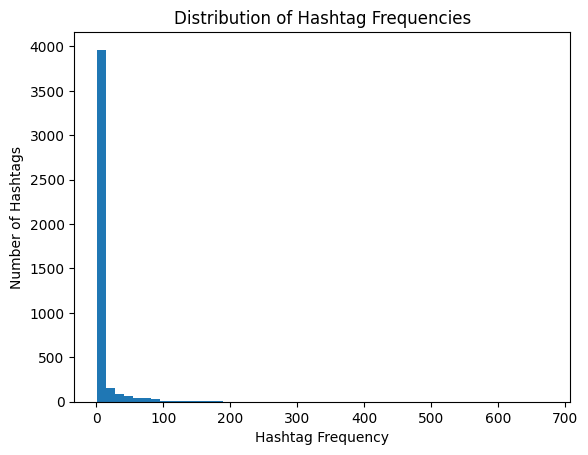

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Preprocessing: Dropping rows with missing hashtags
data = data.dropna(subset=['tweet_hashtags'])

# Preprocessing: Creating a new column to indicate the frequency of each hashtag
hashtags_freq = data['tweet_hashtags'].str.split(',')
hashtags_freq_counts = hashtags_freq.explode().value_counts()

# Explore the distribution of hashtag frequencies
plt.hist(hashtags_freq_counts, bins=50)
plt.xlabel('Hashtag Frequency')
plt.ylabel('Number of Hashtags')
plt.title('Distribution of Hashtag Frequencies')
plt.show()


In [ ]:
import pandas as pd


# Combine predicted labels with tokenized hashtags
predicted_data = pd.DataFrame({'hashtags': X_test, 'predicted_label': y_pred})

# Filter tweets predicted as trending (predicted_label = 1)
trending_tweets = predicted_data[predicted_data['predicted_label'] == 1]

# Flatten and count trending hashtags
trending_hashtags = trending_tweets['hashtags'].explode()
trending_hashtag_counts = trending_hashtags.value_counts()

# To display the top trending hashtags
print("Top Trending Hashtags:")
print(trending_hashtag_counts.head(3))

Top Trending Hashtags:
mufc      171
munlee    147
mciars    121
Name: hashtags, dtype: int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20216 entries, 0 to 25338
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tweet_id                  20216 non-null  object 
 1   tweet_datetime            20216 non-null  object 
 2   tweet_hashtags            20216 non-null  object 
 3   tweet_language            20216 non-null  object 
 4   retweet_count             20216 non-null  object 
 5   tweet_source              20212 non-null  object 
 6   tweet_source_url          20212 non-null  object 
 7   tweet_text                20212 non-null  object 
 8   user_created_datetime     20212 non-null  object 
 9   user_name                 20212 non-null  object 
 10  user_followers_count      20212 non-null  float64
 11  user_description          16937 non-null  object 
 12  user_location             12784 non-null  object 
 13  searched_by_hashtag       20209 non-null  object 
 14  search

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report



# Train the Gradient Boosting Decision Trees (GBDT) classifier
gbdt_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbdt_classifier.fit(X_train_vectorized, y_train)

# Make predictions
y_pred = gbdt_classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.8946587537091988
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      2339
           1       0.97      0.78      0.86      1705

    accuracy                           0.89      4044
   macro avg       0.91      0.88      0.89      4044
weighted avg       0.90      0.89      0.89      4044



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


vectorizer = CountVectorizer(max_features=1000)
X_train_vectorized = vectorizer.fit_transform(X_train.apply(','.join))
X_test_vectorized = vectorizer.transform(X_test.apply(','.join))

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vectorized, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.974036688343201
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89      2436
           1       0.99      0.98      0.99     18170

    accuracy                           0.97     20606
   macro avg       0.93      0.94      0.94     20606
weighted avg       0.97      0.97      0.97     20606

